# Plot Confusion Matrix

## Import Libraries

In [1]:
import tensorflow as tf ##pip install tensorflow-gpu (code to install tensorflow in anaconda cmd)
import cv2 ##pip install opencv-contrib-python (code to install opencv in anaconda cmd)
import os
import matplotlib.pyplot as plt ##pip install matplotlib (code to install matplotlib in anaconda cmd)
import numpy as np ##pip install numpy (code to install numpy in anaconda cmd)
import pandas as pd ##pip install pandas (code to install panda in anaconda cmd)
import seaborn as ans ##pip install seaborn (code to install seaborn in anaconda cmd)
import itertools

# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

## Import Dataset

In [2]:
picture_size = 48
folder_path = "DataSet/images/"

## Test and Display Dataset

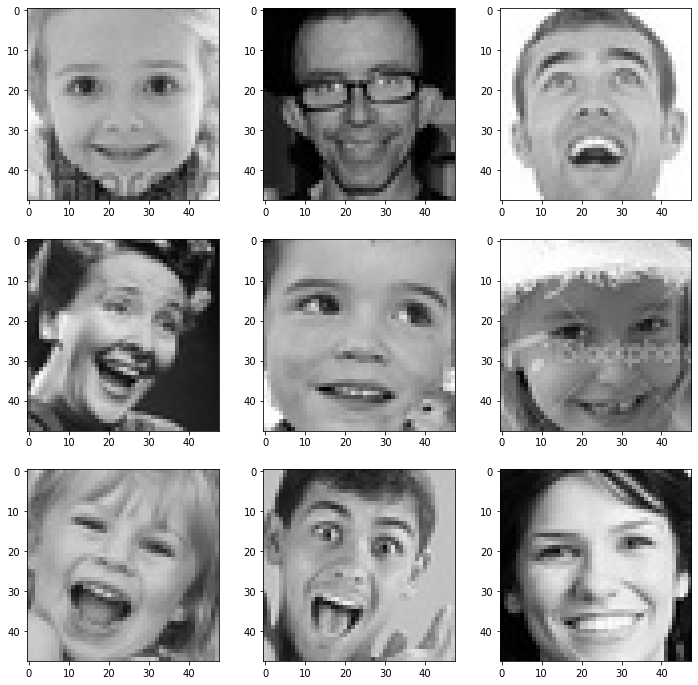

In [3]:
expression = 'happy' ## select expression

plt.figure(figsize= (12,12)) ## set plot figure size
for i in range(1, 10, 1): ## loop and select a range of images
    plt.subplot(3,3,i) ## show the images in a 3 x 3 format
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

## Collect Image using ImageDataGenerator

In [4]:
batch_size  = 128 ## how many training example (files) that your model should take in one iteration


datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                     http://localhost:8888/notebooks/PlotConfucionMatrixAndReport.ipynb#Plot-Classification-Report         target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 18055 images belonging to 6 classes.
Found 3025 images belonging to 6 classes.


# Plot Classification Report

In [5]:
best_model = tf.keras.models.load_model('model.h5')

Y_pred = best_model.predict(test_set, 3332 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print('\n') 
print(confusion_matrix(test_set.classes, y_pred))
print('\n') 
print('Classification Report')
#target_names = ["AP2","AP3","AP4","AP5","PLAX","PSAX-AP","PSAX-AV","PSAX-MID","PSAX-MV"]
#target_names = ['AP3','AP5','PSAX-AV']
target_names = list(test_set.class_indices.keys())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

#Visualize Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    


Confusion Matrix


[[375  23  16  37  32  18]
 [ 53 322  16  40  32  42]
 [ 21   7 423  21  14  18]
 [ 33   9  29 396  24  13]
 [ 55  47  26  60 302  19]
 [  5   7  10   6   2 472]]


Classification Report
              precision    recall  f1-score   support

       angry       0.69      0.75      0.72       501
        fear       0.78      0.64      0.70       505
       happy       0.81      0.84      0.83       504
     neutral       0.71      0.79      0.74       504
         sad       0.74      0.59      0.66       509
    surprise       0.81      0.94      0.87       502

    accuracy                           0.76      3025
   macro avg       0.76      0.76      0.75      3025
weighted avg       0.76      0.76      0.75      3025



# Plot Confusion Matrix

Confusion matrix, without normalization
[[375  23  16  37  32  18]
 [ 53 322  16  40  32  42]
 [ 21   7 423  21  14  18]
 [ 33   9  29 396  24  13]
 [ 55  47  26  60 302  19]
 [  5   7  10   6   2 472]]


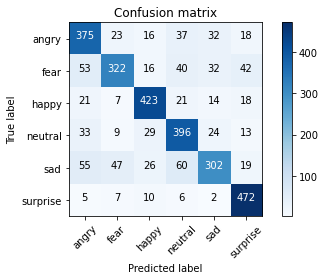

In [6]:
results = best_model.predict(test_set, 3332 // batch_size)

# convert from class probabilities to actual class predictions
predicted_classes = np.argmax(results, axis=1)

# Names of predicted classes
class_names = list(test_set.class_indices.keys())
#class_names = ['AP3','AP5','PSAX-AV']

# Generate the confusion matrix
cnf_matrix = confusion_matrix(test_set.classes, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()